Plotting ...


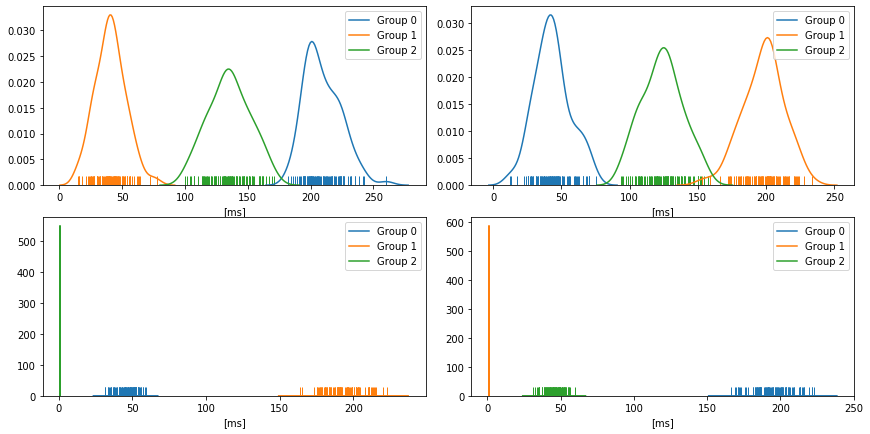

In [2]:
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Plotting ...")
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

temp = []

temp.append(rtt_matrix_loader.analyze_data(source="Seattle", drange=1000, threshold=250, k=3))
temp.append(rtt_matrix_loader.analyze_data(source="PlanetLab", drange=1000, threshold=250, k=3))
temp.append(rtt_matrix_loader.analyze_data(source="i11", drange=100, threshold=250, k=3))
temp.append(rtt_matrix_loader.analyze_data(source=None, drange=100, threshold=250, k=3))


fig.tight_layout(w_pad=1.5)

for idx, clf in enumerate(temp):
    k = 3
    drange=100
    variance = [np.sqrt(np.trace(clf.covariances_[i])/k) for i in range(0,k)]
    mean = clf.means_
    axz = ax[int("{0:{fill}2b}".format(idx, fill='0')[0])][int("{0:{fill}2b}".format(idx, fill='0')[1])]
    
    for i in range(0,k):
        t = np.random.normal(mean[i], variance[i], drange)
        
        sns.distplot(t, hist=False, rug=True, ax=axz, label="Group {}".format(i))

    axz.set_xlabel("[ms]")
fig.savefig("../plots/latency_distr_4.pdf")

Plotting ...


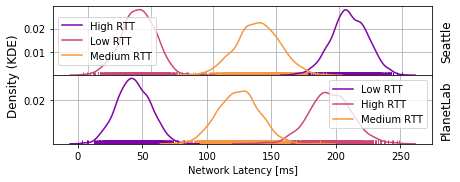

In [54]:
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Plotting ...")
fig, ax = plt.subplots(2,1, figsize=(6, 2.5))
labels1 = ["High RTT", "Low RTT", "Medium RTT"]
labels2 = ["Low RTT", "High RTT", "Medium RTT"]
temp = []

sns.set_palette("plasma", 3)

temp.append(rtt_matrix_loader.analyze_data(source="Seattle", drange=1000, threshold=250, k=3))
temp.append(rtt_matrix_loader.analyze_data(source="PlanetLab", drange=1000, threshold=250, k=3))

fig.tight_layout(w_pad=1.5)

for idx, clf in enumerate(temp):
    k = 3
    drange=1000
    variance = [np.sqrt(np.trace(clf.covariances_[i])/k) for i in range(0,k)]
    mean = clf.means_

    for i in range(0,k):
        t = np.random.normal(mean[i], variance[i], drange)
        if idx == 0:
            sns.distplot(t, hist=False, rug=True, ax=ax[idx], label=labels1[i])
        else:
            sns.distplot(t, hist=False, rug=True, ax=ax[idx], label=labels2[i])

    ax[idx].set_xlabel("Network Latency [ms]")

    
ax[0].text(1.02, 1.5, "Seattle", {'fontsize': 12},
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90,
         clip_on=False,
         transform=plt.gca().transAxes)
   
ax[1].text(1.02, 0.5, "PlanetLab", {'fontsize': 12},
     horizontalalignment='left',
     verticalalignment='center',
     rotation=90,
     clip_on=False,
     transform=plt.gca().transAxes)

ax[0].text(-0.12, 1, "Density (KDE)", {'fontsize': 12},
     horizontalalignment='left',
     verticalalignment='center',
     rotation=90,
     clip_on=False,
     transform=plt.gca().transAxes)
    
plt.subplots_adjust(hspace=.0)
plt.setp(ax[0].get_xticklabels(), visible=False)

yticks = ax[0].yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)
yticks[0].tick1line.set_visible(False)

yticks = ax[1].yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)
yticks[0].tick1line.set_visible(False)

for ax_ in ax:
    ax_.grid()

fig.savefig("../plots/latency_distr_2.pdf")

# added plot

In [63]:
## This will change the style of the plots a bit
import matplotlib

plt.style.use('classic')

matplotlib.rcParams['axes.facecolor'] = 'w'
matplotlib.rcParams['axes.edgecolor'] = 'k'
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rcParams['lines.color'] = 'xkcd:blue'
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20

width = 7
height = width / 1.618

# Use matplotlib fonts
matplotlib.rcParams['text.usetex']=True

Plotting ...


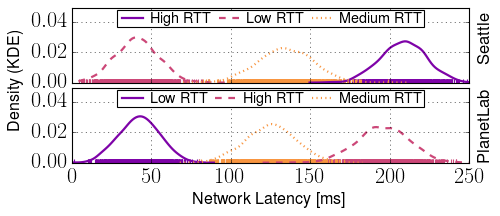

In [146]:
from lib import wlanlrz_loader, rtt_matrix_loader, inference_loader, solver
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Plotting ...")
fig, ax = plt.subplots(2,1, figsize=(6, 2.5))
labels1 = ["High RTT", "Low RTT", "Medium RTT"]
labels2 = ["Low RTT", "High RTT", "Medium RTT"]
linestyles = ['-', '--', ':']
temp = []

sns.set_palette("plasma", 3)

temp.append(rtt_matrix_loader.analyze_data(source="Seattle", drange=1000, threshold=250, k=3))
temp.append(rtt_matrix_loader.analyze_data(source="PlanetLab", drange=1000, threshold=250, k=3))

for idx, clf in enumerate(temp):
    k = 3
    drange=1000
    variance = [np.sqrt(np.trace(clf.covariances_[i])/k) for i in range(0,k)]
    mean = clf.means_

    for i in range(0,k):
        t = np.random.normal(mean[i], variance[i], drange)
        if idx == 0:
            a = sns.distplot(t, hist=False, rug=True, ax=ax[idx], label=labels1[i])
            
        else:
            b = sns.distplot(t, hist=False, rug=True, ax=ax[idx], label=labels2[i])
                        
[line.set_linestyle(linestyles[il]) for il, line in enumerate(a.lines)]
[line.set_linestyle(linestyles[il]) for il, line in enumerate(b.lines)] 

ax[1].set_xlabel("Network Latency [ms]", fontsize=14.5)

    
ax[0].text(1.02, 1.65, "Seattle", {'fontsize': 15},
         horizontalalignment='left',
         verticalalignment='center',
         rotation=90,
         clip_on=False,
         transform=plt.gca().transAxes)
   
ax[1].text(1.02, 0.5, "PlanetLab", {'fontsize': 15},
     horizontalalignment='left',
     verticalalignment='center',
     rotation=90,
     clip_on=False,
     transform=plt.gca().transAxes)

ax[0].text(-0.16, 1.1, "Density (KDE)", {'fontsize': 14.5},
     horizontalalignment='left',
     verticalalignment='center',
     rotation=90,
     clip_on=False,
     transform=plt.gca().transAxes)
    
plt.subplots_adjust(hspace=.0)
plt.setp(ax[0].get_xticklabels(), visible=False)

yticks = ax[0].yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)
yticks[0].tick1line.set_visible(False)

yticks = ax[1].yaxis.get_major_ticks()
# yticks[0].label1.set_visible(False)
yticks[0].tick1line.set_visible(False)

for ax_ in ax:
    ax_.grid()
    ax_.legend(borderpad=0.1, fontsize=13, loc=9, ncol=3,
                labelspacing=0.05, handletextpad=0.25,
                borderaxespad=0.15, columnspacing=0.2)
    ax_.set_yticks([0, 0.02, 0.04])
    ax_.set_ylim(0, 0.049)
    ax_.set_xlim(0,250)

plt.tight_layout(pad=0, h_pad=-2.8)

fig.savefig("../plots/latency_distr_2.pdf", bbox_inches="tight")